# LightGBM Model

## Importing libraries

In [ ]:
!pip install shap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 547.9/547.9 kB 6.1 MB/s eta 0:00:00


## Importing library

In [ ]:
import lightgbm as ltb
from sklearn import metrics
import pandas as pd
import matplotlib.pyplot as plt
import shap

Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)


## Importing the dataset

In [ ]:
my_ds = pd.read_csv('breast-cancer.csv')
x = my_ds.iloc[:, 2:]
y = my_ds.iloc[:, 1].values

## Droping cols with tiny impact on dependent variable

In [ ]:
x = x.drop(['smoothness_se','texture_se', 'symmetry_se', 'fractal_dimension_mean', 'fractal_dimension_se'], axis=1)

In [ ]:
feature_names = list(x.columns)

In [ ]:
x = x.values

## Encoding Dependent Variable

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)

## Splitting the dataset into the training set and the test set

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

## Finding Best Hyperparameters


In [ ]:
from sklearn.model_selection import GridSearchCV
from numpy import arange


classifier = ltb.LGBMClassifier(objective='binary',
                                metric='auc',
                                is_unbalance=False,
                                boosting='gbdt')

parameters = [ {
    'num_iterations': list(range(50, 151, 1)),
    'learning_rate': arange(0.01, 0.2, 0.01),
    'num_leaves': list(range(2, 128)),
    'subsample': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1],
    'bagging_freq': [1],
    'colsample_bytree': [0.5, 0.6, 0.7, 0.8, 0.9, 1],
    'min_data_in_leaf': list(range(10, 100)),
    'max_depth': list(range(1, 50)),

    'random_state' : [0]
} ]

grid_search = GridSearchCV(
    estimator = classifier,
    param_grid = parameters,
    scoring = 'accuracy',
    cv = 10,
    n_jobs = -1
)

grid_search.fit(x_train, y_train)
best_accuracy = grid_search.best_score_
best_parameters = grid_search.best_params_
print("Best Accuracy: {:.10f} %".format(best_accuracy*100))
print("Best Parameters:", best_parameters)

[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
Best Accuracy: 98.2512077295 %
Best Parameters: {'bagging_freq': 1, 'colsample_bytree': 0.5, 'learning_rate': 0.19, 'max_depth': 9, 'min_data_in_leaf': 20, 'num_iterations': 149, 'num_leaves': 16, 'random_state': 0, 'subsample': 1}


Found `num_iterations` in params. Will use it instead of argument


## Re-training model with optimal parameters

In [ ]:
lgbm_classifier = ltb.LGBMClassifier(objective='binary',
                                      metric='auc',
                                      is_unbalance=False,
                                      boosting='gbdt',
                                      **best_parameters)
lgbm_classifier.fit(x_train, y_train)

Found `num_iterations` in params. Will use it instead of argument


LGBMClassifier(bagging_freq=1, boosting='gbdt', colsample_bytree=0.5,
               is_unbalance=False, learning_rate=0.19, max_depth=9,
               metric='auc', min_data_in_leaf=20, num_iterations=149,
               num_leaves=16, objective='binary', random_state=0, subsample=1)

# SHAP

**Expainer**

In [ ]:
# Fits the explainer
explainer = shap.Explainer(lgbm_classifier.predict, x_test)
# Calculates the SHAP values - It takes some time
shap_values = explainer(x_test)

Permutation explainer: 115it [00:36,  2.49it/s]


**Bar Plot**

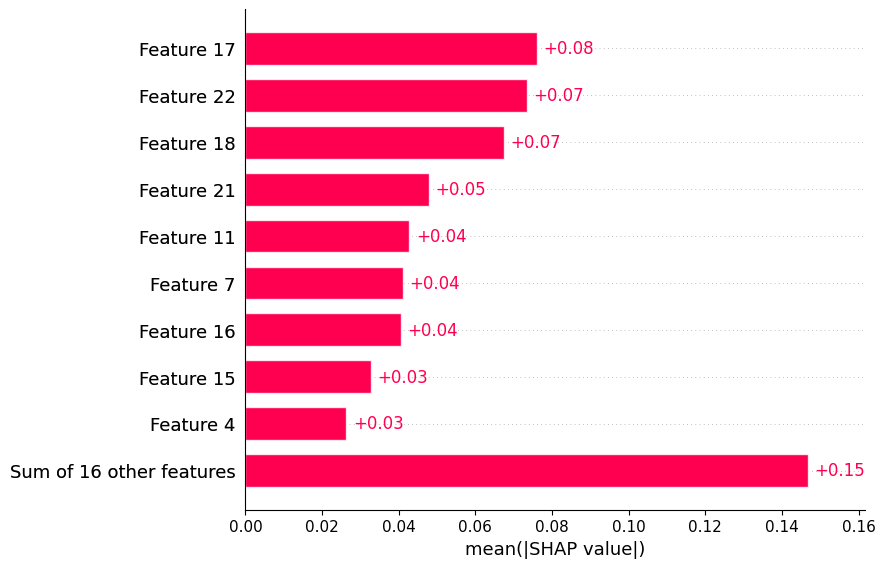

In [ ]:
shap.plots.bar(shap_values)

**Summary Plot**

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


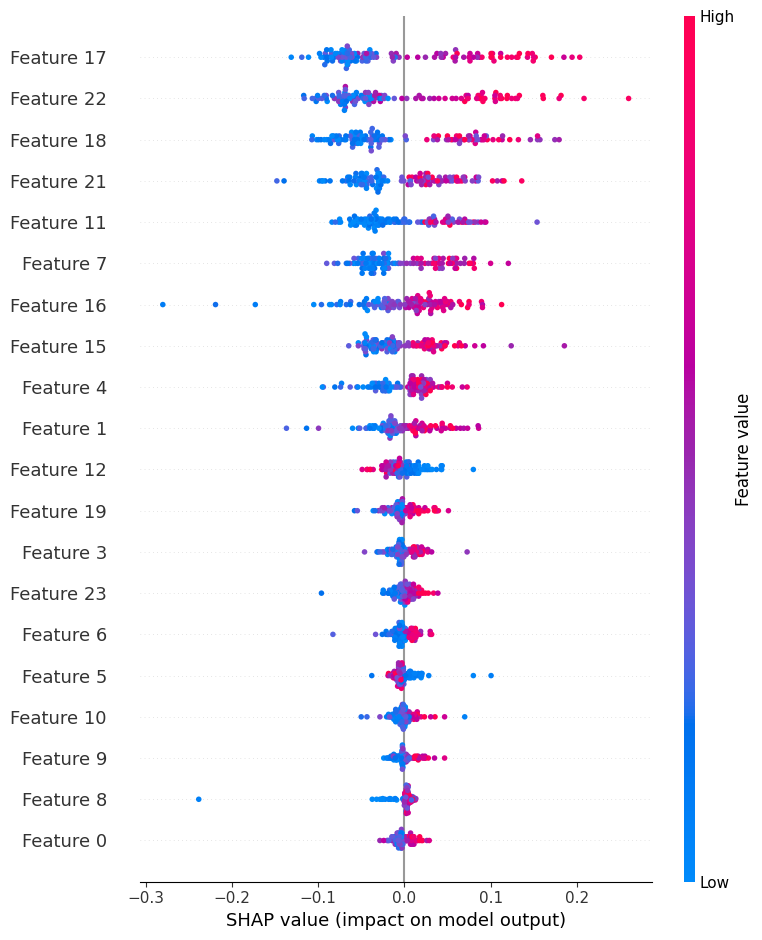

In [ ]:
shap.summary_plot(shap_values)

**Summary Plot Violin**

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


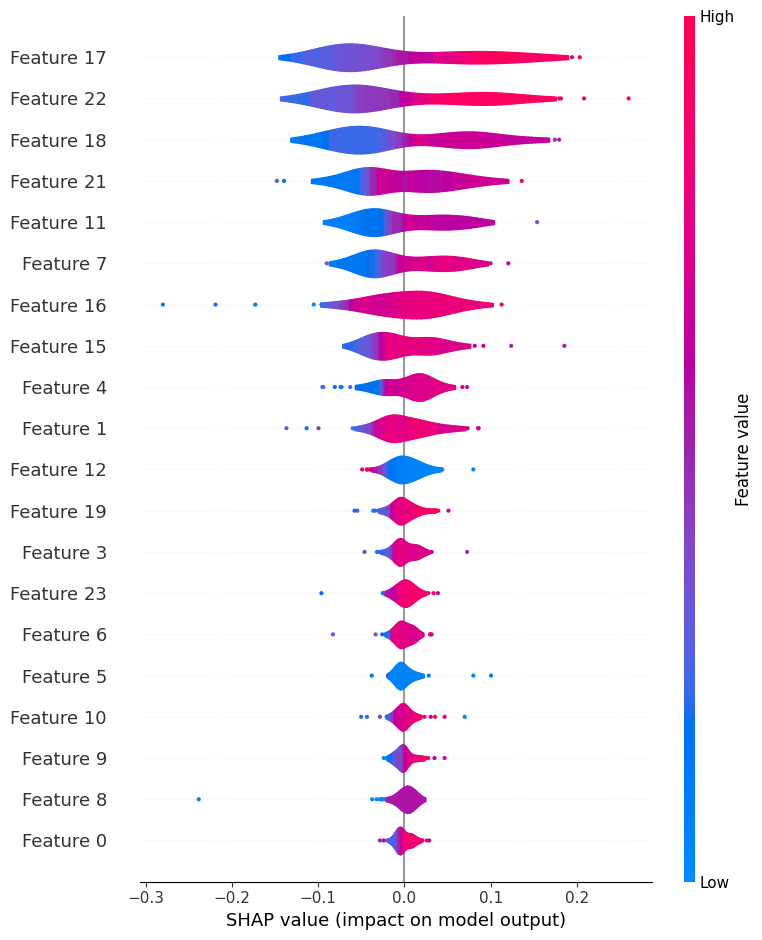

In [ ]:
shap.summary_plot(shap_values, plot_type='violin')

**Local Bar Plot**

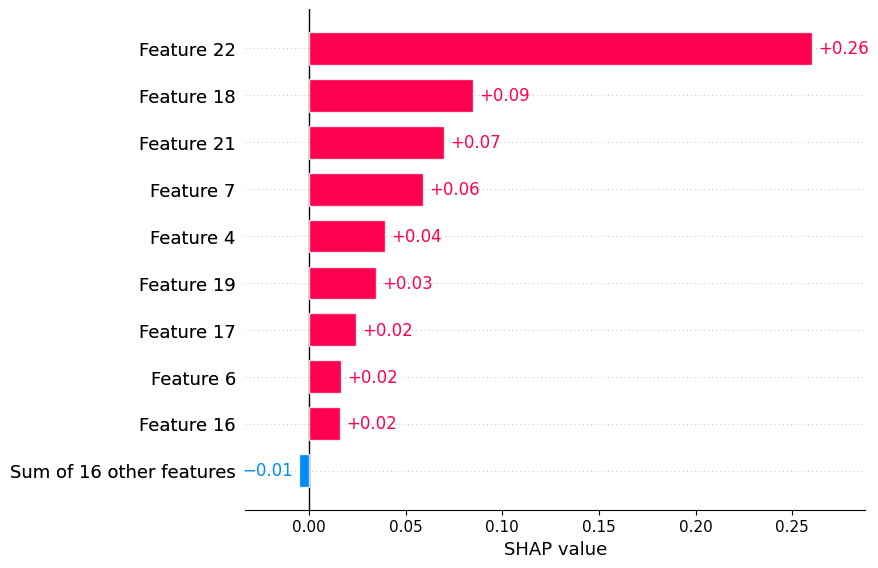

In [ ]:
shap.plots.bar(shap_values[0])

# Applying k-fold cross validation

In [ ]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator=lgbm_classifier, X=x_train, y=y_train, cv=10)

Found `num_iterations` in params. Will use it instead of argument
Found `num_iterations` in params. Will use it instead of argument
Found `num_iterations` in params. Will use it instead of argument


[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_da

Found `num_iterations` in params. Will use it instead of argument
Found `num_iterations` in params. Will use it instead of argument
Found `num_iterations` in params. Will use it instead of argument
Found `num_iterations` in params. Will use it instead of argument


[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_da

Found `num_iterations` in params. Will use it instead of argument
Found `num_iterations` in params. Will use it instead of argument
Found `num_iterations` in params. Will use it instead of argument


In [ ]:
print("Accuracy: {:.10f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.10f} %".format(accuracies.std()*100))

Accuracy: 98.2512077295 %
Standard Deviation: 1.8974871331 %


## Prediction

In [ ]:
y_pred = lgbm_classifier.predict(x_test)

## Evaluating the result

### Evaluate using confusion matrix & accuracy score

In [ ]:
metrics.accuracy_score(y_test, y_pred)

0.9736842105263158

In [ ]:
cm = metrics.confusion_matrix(y_test, y_pred)
print(cm)

[[67  0]
 [ 3 44]]


### Confusion Martix with labels

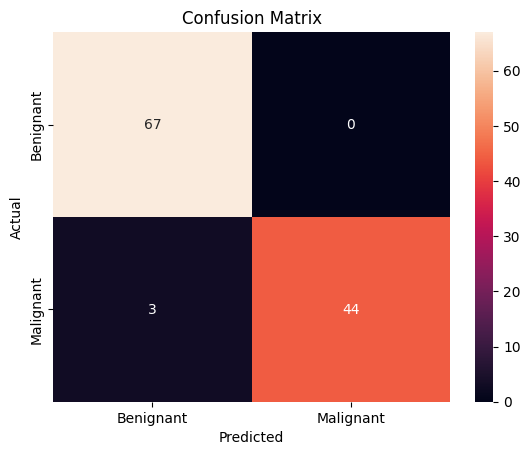

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

ax= plt.subplot()
sns.heatmap(cm, annot=True, fmt='g', ax=ax);  #annot=True to annotate cells, ftm='g' to disable scientific notation

# labels, title and ticks
ax.set_xlabel('Predicted');ax.set_ylabel('Actual');
ax.set_title('Confusion Matrix');
ax.xaxis.set_ticklabels(['Benignant', 'Malignant']); ax.yaxis.set_ticklabels(['Benignant', 'Malignant']);

### Evaluating using classification report

In [ ]:
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98        67
           1       1.00      0.94      0.97        47

    accuracy                           0.97       114
   macro avg       0.98      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



### Specificity & Sensitivity Score

In [ ]:
from imblearn.metrics import sensitivity_specificity_support

pd.DataFrame(sensitivity_specificity_support(y_test, y_pred, average=None), index=['Sensitivity', 'Specificity', 'Support']).T

,Sensitivity,Specificity,Support
0,1.00000,0.93617,67.0
1,0.93617,1.00000,47.0


## ROC Curve

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score

y_pred_proba = lgbm_classifier.predict_proba(x_test)

In [ ]:
pd.DataFrame(y_pred_proba)

,0,1
0,3.199474e-08,1.000000e+00
1,9.999490e-01,5.100761e-05
2,9.999999e-01,7.522265e-08
3,9.999996e-01,3.938490e-07
4,9.999991e-01,9.072476e-07
...,...,...
109,1.631957e-04,9.998368e-01
110,9.999999e-01,7.694168e-08
111,3.091777e-08,1.000000e+00
112,8.395975e-09,1.000000e+00


The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.


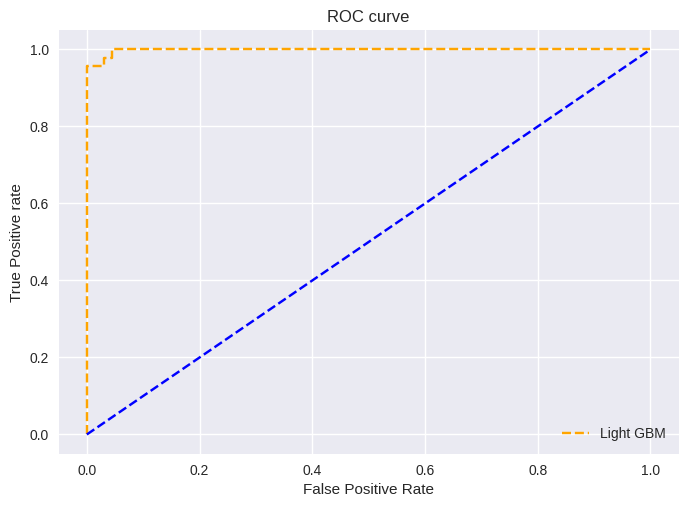

In [ ]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba[:, 1])

# roc curve for tpr = fpr
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)

plt.style.use('seaborn')

# plot roc curves
plt.plot(fpr, tpr, linestyle='--',color='orange', label='Light GBM')
plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')

# title
plt.title('ROC curve')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')

plt.legend(loc='best')
plt.savefig('ROC',dpi=300)
plt.show();

In [ ]:
print("ROC AUC Score: ", roc_auc_score(y_test, y_pred_proba[:,1]))

ROC AUC Score:  0.9984121943474118


## Precision Recall Curve (PRC)

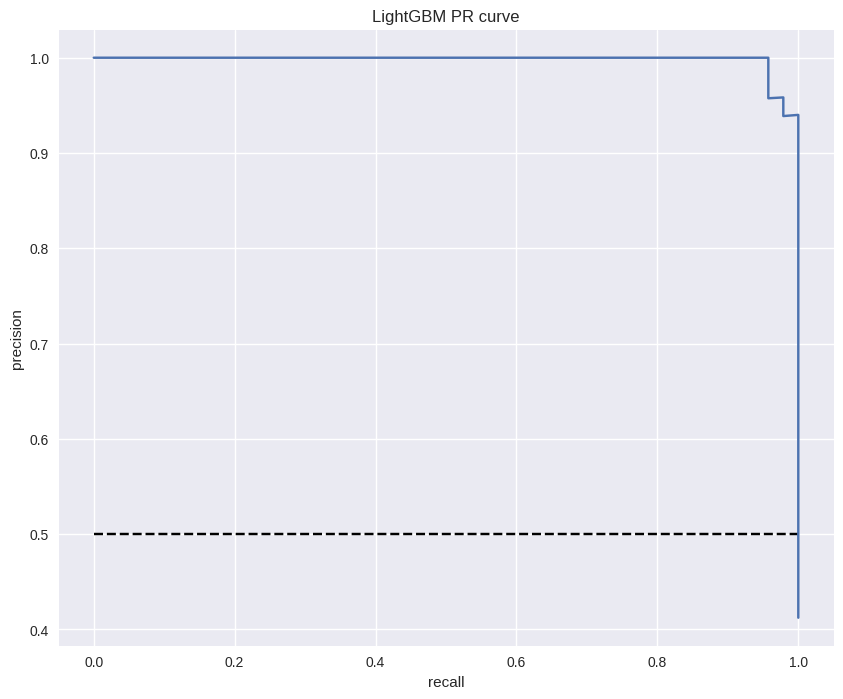

In [ ]:
from sklearn.metrics import precision_recall_curve, auc

precision, recall, thresholds = precision_recall_curve(y_test, y_pred_proba[:, 1])

plt.figure(figsize = (10,8))
plt.plot([0, 1], [0.5, 0.5],'k--')
plt.plot(recall, precision, label = 'Knn')
plt.xlabel('recall')
plt.ylabel('precision')
plt.title('LightGBM PR curve')
plt.show()

In [ ]:
print("PRC AUC Score: ", auc(recall, precision))

PRC AUC Score:  0.9978144218302984
